In [1]:
import pandas as pd
import numpy as np
import pygad as pg
import time

# Limpieza y preparación de los datos

## Lectura de datos

In [2]:
d16 = pd.read_csv('./datos/datos_2016.csv')
d17 = pd.read_csv('./datos/datos_2017.csv')
d18 = pd.read_csv('./datos/datos_2018.csv')
d19 = pd.read_csv('./datos/datos_2019.csv')
d2021 = pd.read_csv('./datos/2020_2021.csv')

In [3]:
asignaturas = pd.read_csv('asignaturas2.csv',encoding = 'ISO-8859-1')

In [4]:
plan_2016 = asignaturas.query('plan == "IDP2016"')

In [5]:
oferta = pd.read_csv('oferta_ideio.csv',encoding = 'ISO-8859-1')

In [6]:
seriaciones = pd.read_csv('seriacion.csv')

## Visualización de datos

In [7]:
d16.head()

,Unnamed: 0,carrera,periodo,clave,asignatura,promediofinal,docente,ceveval_global,ceneval_analitico,ceneval_matematico,...,r_modulo8,modulo9,r_modulo9,modulo10,r_modulo10,modulo11,r_modulo11,modulo12,r_modulo12,n_matricula
0,0,Negocios Internacionales,201601,DP0295,Taller de formación en responsabilidad social ...,10.0,Maldonado Saldaña / Gisela,1150.0,1108.0,1228.0,...,-,Cálculo,-,Inglés,-,Administración,-,Informática y Computación,-,140311285
1,1,Negocios Internacionales,201601,NI0215,Taller de software para negocios internacionales,9.0,Villeda Cuellar / Víctor Hugo,1150.0,1108.0,1228.0,...,-,Cálculo,-,Inglés,-,Administración,-,Informática y Computación,-,140311285
2,2,Negocios Internacionales,201601,LI1104,Nivel 4 Inglés,10.0,Ross / Andrew Patrick Simon,1150.0,1108.0,1228.0,...,-,Cálculo,-,Inglés,-,Administración,-,Informática y Computación,-,140311285
3,3,Negocios Internacionales,201601,NI0209,Administración financiera,6.0,Vallejo Filoteo / Jorge,1150.0,1108.0,1228.0,...,-,Cálculo,-,Inglés,-,Administración,-,Informática y Computación,-,140311285
4,4,Negocios Internacionales,201601,NI0213,Transporte y logística en comercio exterior,9.0,Cañedo Magaña / Magdalena del Carmen,1150.0,1108.0,1228.0,...,-,Cálculo,-,Inglés,-,Administración,-,Informática y Computación,-,140311285


In [8]:
d2021.head()

,Unnamed: 0,Column1,programa,periodo,clave,asignatura,docente,promediofinal,ceveval_global,hrs_trabaja,n_matricula
0,0,1,Ingeniería en Datos e Inteligencia Organizacional,202001,IL0414,Taller de argumentación y técnicas de negociación,Torres Pérez / Rubén Juan,7.0,952.0,De 5 a 10 horas,170311163
1,1,2,Ingeniería en Datos e Inteligencia Organizacional,202001,II0422,Taller de emprendedores,Zapata Solís / Zuemy De Lourdes,8.0,1048.0,No trabajaba,180311454
2,2,3,Ingeniería en Datos e Inteligencia Organizacional,202001,DP0498,Problemas de México,Díaz Molina / Libertad Fidelina,9.0,1144.0,De 5 a 10 horas,170311232
3,3,4,Ingeniería en Datos e Inteligencia Organizacional,202001,IT0264,Introducción a los sistemas de información,Olivares González / Oscar,10.0,1072.0,De 11 a 15 horas,190311813
4,4,5,Ingeniería en Datos e Inteligencia Organizacional,202001,II0215,Electricidad y magnetismo,Ramírez Carmona / Leslye Johanna,7.0,1018.0,Más de 20 horas,180311416


In [9]:
asignaturas.head()

,ciclos,clave,nombre,creditos,tipo,plan,preespecialidad
0,1,II0106,Cálculo diferencial,8,Basica,IAP2019,NaN
1,1,II0209,Cálculo integral,6,Basica,IAP2019,NaN
2,1,DP0194,Desarrollo de habilidades del pensamiento,6,Basica,IAP2019,NaN
3,1,IA0106,Ecología,6,Basica,IAP2019,NaN
4,1,II0102,Física experimental,8,Basica,IAP2019,NaN


In [10]:
plan_2016.head()

,ciclos,clave,nombre,creditos,tipo,plan,preespecialidad
603,1,IT0101,Algoritmos y estructura de datos,6,Basica,IDP2016,NaN
604,1,II0106,Cálculo diferencial,8,Basica,IDP2016,NaN
605,1,II0209,Cálculo integral,6,Basica,IDP2016,NaN
606,1,DP0194,Desarrollo de habilidades del pensamiento,6,Basica,IDP2016,NaN
607,1,ID0101,Diseño de patrones para datos estructurados,6,Basica,IDP2016,NaN


In [11]:
oferta.head()

,Ciclo,Trayectoria,Tipo,Clave,Nombre,Maestro,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado
0,1,0,BAS,DP0193,Taller de redacción profesional,Alvarado Martínez / María Del Carmen,-,-,17:00-18:00,-,16:00-18:00,-
1,1,0,BAS,DP0191,Taller de interacción grupal y competencias co...,Diaz Barriga Cuevas / Claudia,-,-,-,15:00-17:00,17:00-18:00,-
2,1,0,BAS,DP0191,Taller de interacción grupal y competencias co...,Diaz Barriga Cuevas / Claudia,18:00-20:00,-,-,17:00-18:00,-,-
3,1,0,BAS,DP0193,Taller de redacción profesional,Parra Dorantes / Roberto,-,-,18:00-20:00,-,17:00-18:00,-
4,1,0,BAS,DP0194,Desarrollo de habilidades del pensamiento,Mendoza Luna / José Arturo,-,-,19:00-20:00,-,20:00-22:00,-


In [12]:
seriaciones.head()

,plan,ser1,ser2
0,IDP2016,II0106,II0209
1,IDP2016,ID0102,II0215
2,IDP2016,II0209,II0320
3,IDP2016,ID0103,IT0263
4,IDP2016,IT0264,ID0204


## Limpieza de datos

In [13]:
cargas16_19 = pd.concat([d16,d17,d18,d19])
cargas20_21 = d2021

In [14]:
cargas16_19 = cargas16_19.query('carrera == "Ingeniería en Datos e Inteligencia Organizacional"')

In [15]:
cargas16_19 = cargas16_19[['Unnamed: 0', 'carrera', 'periodo', 'clave', 'asignatura',
       'promediofinal', 'docente', 'ceveval_global', 'ceneval_analitico',
       'ceneval_matematico', 'ceneval_lengua', 'ceneval_esp',
       'n_matricula']]

In [16]:
matriculas16 = cargas16_19.query('n_matricula > 160000000 and n_matricula < 170000000')['n_matricula'].unique()
matriculas17 = cargas16_19.query('n_matricula > 170000000 and n_matricula < 180000000')['n_matricula'].unique()
matriculas18 = cargas16_19.query('n_matricula > 180000000 and n_matricula < 190000000')['n_matricula'].unique()
matriculas19 = cargas16_19.query('n_matricula > 190000000 and n_matricula < 200000000')['n_matricula'].unique()
matriculas20 = cargas20_21.query('n_matricula > 200000000 and n_matricula < 210000000')['n_matricula'].unique()
matriculas21 = cargas20_21.query('n_matricula > 210000000 and n_matricula < 220000000')['n_matricula'].unique()

In [17]:
matriculas = np.concatenate((matriculas16, matriculas17,matriculas18,matriculas19,matriculas20,matriculas21))

In [18]:
cargas20_21 = cargas20_21.rename(columns={'programa': 'carrera'})

In [19]:
formato_cargas20_21 = cargas20_21[['carrera', 'periodo', 'clave', 'asignatura','docente','n_matricula','promediofinal']]
formato_cargas16_19 = cargas16_19[['carrera', 'periodo', 'clave', 'asignatura','docente','n_matricula','promediofinal']]

formato_cargas = pd.concat([formato_cargas16_19,formato_cargas20_21])

In [20]:
oferta = oferta[['Clave','Nombre', 'Maestro', 'Lunes','Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado']]

In [21]:
oferta['Lunes'].unique()

array(['-', '18:00-20:00', '17:00-19:00', '20:00-22:00', '15:00-17:00',
       '9:00-11:00', '19:00-21:00', '19:00-20:00', '7:00-9:00',
       '11:00-13:00', '13:00-14:00', '16:00-18:00', '14:00-16:00',
       '7:00-10:00', '7:00-8:00', '16:00-19:00', '21:00-22:00',
       '16:00-17:00'], dtype=object)

In [22]:
oferta['Martes'].unique()

array(['-', '15:00-17:00', '20:00-21:00', '20:00-22:00', '19:00-20:00',
       '16:00-18:00', '18:00-19:00', '7:00-9:00', '9:00-11:00',
       '18:00-20:00', '14:00-16:00', '13:00-15:00', '8:00-9:00'],
      dtype=object)

In [23]:
oferta['Miercoles'].unique()

array(['17:00-18:00', '-', '18:00-20:00', '19:00-20:00', '16:00-17:00',
       '15:00-17:00', '20:00-21:00', '20:00-22:00', '18:00-19:00',
       '12:00-14:00', '7:00-9:00', '9:00-11:00', '11:00-12:00',
       '11:00-13:00', '\n13:00-15:00', '13:00-15:00', '17:00-19:00',
       '19:00-21:00', '15:00-16:00', '12:00-13:00', '8:00-10:00',
       '7:00-8:00', '10:00-12:00', '16:00-18:00', '14:00-15:00'],
      dtype=object)

In [24]:
oferta['Jueves'].unique()

array(['-', '15:00-17:00', '17:00-18:00', '20:00-21:00', '16:00-17:00',
       '9:00-10:00', '20:00-22:00', '18:00-20:00', '19:00-21:00',
       '7:00-8:00', '13:00-14:00', '8:00-9:00', '9:00-11:00',
       '16:00-18:00', '14:00-15:00', '13:00-15:00', '7:00-9:00',
       '15:00-16:00', '18:00-19:00', '19:00-20:00', '21:00-22:00'],
      dtype=object)

In [25]:
oferta['Viernes'].unique()

array(['16:00-18:00', '17:00-18:00', '-', '20:00-22:00', '15:00-17:00',
       '14:00-15:00', '18:00-20:00', '20:00-21:00', '13:00-14:00',
       '9:00-10:00', '7:00-9:00', '10:00-11:00', '16:00-17:00',
       '14:00-16:00', '18:00-19:00', '8:00-10:00', '19:00-20:00',
       '19:00-21:00'], dtype=object)

In [26]:
oferta.loc[36,'Miercoles'] = '13:00-15:00'

In [27]:
oferta['Miercoles'].unique()

array(['17:00-18:00', '-', '18:00-20:00', '19:00-20:00', '16:00-17:00',
       '15:00-17:00', '20:00-21:00', '20:00-22:00', '18:00-19:00',
       '12:00-14:00', '7:00-9:00', '9:00-11:00', '11:00-12:00',
       '11:00-13:00', '13:00-15:00', '17:00-19:00', '19:00-21:00',
       '15:00-16:00', '12:00-13:00', '8:00-10:00', '7:00-8:00',
       '10:00-12:00', '16:00-18:00', '14:00-15:00'], dtype=object)

In [28]:
def formatoHora(hora):
    if len(hora) == 11:
        return hora
    elif len(hora) == 10:
        return '0' + hora
    elif len(hora) == 9:
        return '0' + hora[0:5] + '0' + hora[5:]
    elif len(hora) == 1:
        return '-'

In [29]:
oferta['Lunes'] = oferta['Lunes'].apply(lambda horas: formatoHora(horas))
oferta['Martes'] = oferta['Martes'].apply(lambda horas: formatoHora(horas))
oferta['Miercoles'] = oferta['Miercoles'].apply(lambda horas: formatoHora(horas))
oferta['Jueves'] = oferta['Jueves'].apply(lambda horas: formatoHora(horas))
oferta['Viernes'] = oferta['Viernes'].apply(lambda horas: formatoHora(horas))

# Definición de funciones útiles

## Función para obtener un Kardex aleatorio

In [30]:
def obtenerKardex(mat = -1):
    if(mat == -1):
        mat = np.random.choice(matriculas)
    return formato_cargas.query('n_matricula == ' + str(mat)).sort_values('periodo')

In [31]:
def obtenerCreditos(kardex):
    claves = kardex.query('promediofinal >= 7')['clave'].unique()
    totalCreditos = 0
    for clave in claves:
        if(clave[0:2] == 'LI' or clave[0:2] == 'TA' or clave[0:2] == 'AD'):
            continue
        totalCreditos += plan_2016.query('clave == "' + clave + '"')['creditos'].values[0]
    return totalCreditos

## Obtención de oferta útil

En este sección se crea la función "obtenerOfertaUtil" la cual filtra la oferta académica para eliminar las materias que no cumplen con la restricción de llevar materias aprobadas y la restricción de llevar materias que no respeten la seriación.

In [32]:
def materiaHaSidoAprobada(kardex,clave):
    if len(kardex.query('clave == "' + clave + '" and promediofinal >= 7')) == 0:
        return False
    else:
        return True

In [33]:
def respetaSeriacion(clave,kardex):
    if len(seriaciones.query('ser2 == "' + clave + '"')) == 0:
        return True
    else:
        #Se guarda en necesarias la lista de asignaturas necesarias para llevar la asignura "clave"
        necesarias = seriaciones.query('ser2 == "' + clave + '"')['ser1'].unique()
        
        #Se recorre la lista para comprobar si el estudiante ya pasó las asignaturas necesarias, en caso de que le falte 
        #al menos una, entonces no se respeta la seriación.
        for necesaria in necesarias:
            if materiaHaSidoAprobada(kardex,necesaria):
                return False
        return True

In [34]:
#Filtra las materias que no cumplen las restricciones 1 y 2

def obtenerOfertaUtil(kardex,oferta):
    #Se eliminan las materias en la oferta que ya han sido aprobadas
    aprobadas = kardex.query('promediofinal >= 7')['clave'].unique()
    for clave in aprobadas:
        oferta = oferta.query('Clave != "' + clave + '"')
        
    #Se eliminan las materias que el alumno no puede llevar por la seriación
    ofertaUtilIndex = []
    for i in range(len(oferta)):
        if respetaSeriacion(oferta.iloc[i]['Clave'],kardex):
            ofertaUtilIndex.append(i)
    ofertaUtil = oferta.iloc[ofertaUtilIndex]
    return ofertaUtil

## Generación de carga aleatoria válida

#### NOTA: Tomar en cuenta materias repetidas y por ahora descartar talleres deportivos, artísticos, lengua inglesa y prácticas profesionales

En esta sección creamos las funciones "generarCargaValida" la cual retorna una string de bits representando una carga académica con base a la oferta útil. También se crea la función "obtenerDatosCarga" que nos ayuda a obtener los datos de una carga académica con base a la oferta útil y a una string de bits que denominamos "bits de carga"

In [35]:
def generarSolucionAleatoria(ofertaUtil):
    solucion = [-1] * 9
    for i in range(9):
        gen = np.random.randint(-1,len(ofertaUtil))
        if gen == -1:
            solucion[i] = -1
        else:
            solucion[i] = ofertaUtil.index[gen]
    return solucion

In [36]:
def obtenerDatosCarga(solucion,ofertaUtil):
    solucionU = np.array(solucion)
    solucionU = np.unique(solucionU)
    solucionU = solucionU[solucionU >= 0]
    
    return ofertaUtil.loc[solucionU]

# ========================================================== 

In [37]:
def comprobarTraslapacion(solucion,ofertaUtil):
    datosCarga = obtenerDatosCarga(solucion,ofertaUtil)
    dias = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado']
    
    for dia in dias:
        horarioDia = datosCarga.sort_values(dia)[dia].values
        for i in range(len(horarioDia)):
            if horarioDia[i] == '-':
                continue
            horaInicioI = int(horarioDia[i][0:2])
            horaFinI = int(horarioDia[i][6:8])
            
            for j in range(i+1,len(horarioDia)):
                horaInicioJ = int(horarioDia[j][0:2])
                horaFinJ = int(horarioDia[j][6:8])
                
                if not(horaFinJ  <= horaInicioI or horaInicioJ >= horaFinI):
                    return True
    return False

In [38]:
def esValido(solucion,ofertaUtil):
    #Si se repite una materia es inválido
    datosCarga = obtenerDatosCarga(solucion,ofertaUtil)
    if len(datosCarga['Clave'].unique()) < len(datosCarga):
        return False
    #Si se traslapan dos materias es inválido
    if comprobarTraslapacion(solucion,ofertaUtil):
        return False
    return True

In [39]:
def generarCargaValida(ofertaUtil):
    bitsDeCarga = generarSolucionAleatoria(ofertaUtil)
    
    while not(esValido(bitsDeCarga,ofertaUtil)):
        bitsDeCarga = generarSolucionAleatoria(ofertaUtil)
    
    return bitsDeCarga

# Definición de funciones de utilidad y de costo

## Utilidad de carga académica con base en las materias reprobadas

In [40]:
def obtenerMateriasReprobadas(kardex):
    materiasReprobadas = kardex.query('promediofinal < 7')['clave'].unique()
    materiasReprobadasFinal = []
    for clave in materiasReprobadas:
        aprobado = len(kardex.query('clave == "' + clave + '" and promediofinal >= 7'))
        if aprobado == 0:
            materiasReprobadasFinal.append(clave)
    return materiasReprobadasFinal

In [41]:
def UpMR(kardex,solucion,ofertaUtil):
    materiasReprobadas = obtenerMateriasReprobadas(kardex)
    if len(materiasReprobadas) == 0:
        return 0
    datosCarga = obtenerDatosCarga(solucion,ofertaUtil)
    utilidadTotal = 0
    
    for clave in materiasReprobadas:
        cargado = len(datosCarga.query('Clave == "' + clave + '"'))
        if cargado == 1:
            utilidadTotal += 1
            
    
    #Normalización
    utilidad = (utilidadTotal)/(len(materiasReprobadas))
    return utilidad

## Utilidad de carga académica con base en el cierre de ciclos

In [42]:
def UpCC(solucion,ofertaUtil):
    utilidad = [27,9,3,1]
    utilidadTotal = 0
    
    datosCarga = obtenerDatosCarga(solucion,ofertaUtil)
    
    claves = datosCarga['Clave'].unique()
    for i in range(len(claves)):
        if claves[i][0:2] == 'AD'or claves[i][0:2] == 'TA' or claves[i][0:2] == 'LI' or claves[i][0:2] == 'PI':
            continue
            
        ciclo = int(plan_2016.query('clave == "' + claves[i] + '"')['ciclos'])
        utilidadTotal += utilidad[ciclo-1]
    
    #Normalización
    utilidadNorm = (utilidadTotal)/(utilidad[0]*9)
    return utilidadNorm

## Costo de carga académica con base en las horas libres

#### NOTA: Tomar en cuenta las horas libres por día

In [43]:
def CpHL(solucion,ofertaUtil):
    dias = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado']
    costoTotal = 0
    
    datosCarga = obtenerDatosCarga(solucion,ofertaUtil)
    
    for dia in dias:
        datosCarga = datosCarga.sort_values(dia)
        ultimaHoraFin = 0
        for i in range(len(datosCarga)):
            if datosCarga.iloc[i][dia] == '-':
                continue
            if ultimaHoraFin == 0:
                ultimaHoraFin = int(datosCarga.iloc[i][dia][6:8])
                continue
            horaInicio = int(datosCarga.iloc[i][dia][0:2])
            costoTotal += (horaInicio - ultimaHoraFin)
            ultimaHoraFin = int(datosCarga.iloc[i][dia][6:8])
          
    #Normalización
    costo = (costoTotal)/(78)
    return costo

## Costo de carga académica con base en la disponibilidad de horario del estudiante

Creamos 4 casos diferentes donde los estudiantes trabajan. Guardamos el horario de ocupación de los estudiantes en un dataframe por cada estudiante.

In [44]:
# El estudiante trabaja por las mañanas tiempo completo
disp_est_1 = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
    "Martes": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
    "Miercoles": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
    "Jueves": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
    "Viernes": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
    "Sabado": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True]
})


# El estudiante trabaja por las tardes tiempo completo
disp_est_2 = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [True,True,True,True,True,True,False,False,False,False,False,False,False,False,False],
    "Martes": [True,True,True,True,True,True,False,False,False,False,False,False,False,False,False],
    "Miercoles": [True,True,True,True,True,True,False,False,False,False,False,False,False,False,False],
    "Jueves": [True,True,True,True,True,True,False,False,False,False,False,False,False,False,False],
    "Viernes": [True,True,True,True,True,True,False,False,False,False,False,False,False,False,False],
    "Sabado": [True,True,True,True,True,True,False,False,False,False,False,False,False,False,False]
})

# El estudiante trabaja por las mañanas medio tiempo
disp_est_3 = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [True,False,False,False,False,False,True,True,True,True,True,True,True,False,False],
    "Martes": [True,False,False,False,False,False,True,True,True,True,True,True,True,False,False],
    "Miercoles": [True,False,False,False,False,False,True,True,True,True,True,True,True,False,False],
    "Jueves": [True,False,False,False,False,False,True,True,True,True,True,True,True,False,False],
    "Viernes": [True,False,False,False,False,False,True,True,True,True,True,True,True,False,False],
    "Sabado": [True,False,False,False,False,False,True,True,True,True,True,True,True,False,False]
})
# El estudiante trabaja por las tardes medio tiempo
disp_est_4 = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [True,True,True,True,True,False,False,False,False,False,True,True,True,True,True],
    "Martes": [True,True,True,True,True,False,False,False,False,False,True,True,True,True,True],
    "Miercoles": [True,True,True,True,True,False,False,False,False,False,True,True,True,True,True],
    "Jueves": [True,True,True,True,True,False,False,False,False,False,True,True,True,True,True],
    "Viernes": [True,True,True,True,True,False,False,False,False,False,True,True,True,True,True],
    "Sabado": [True,True,True,True,True,False,False,False,False,False,True,True,True,True,True]
})
disp_est_5 = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [True,True,True,True,True,True,True,True,True,True,True,True,True,True,True],
    "Martes": [True,True,True,True,True,True,True,True,True,True,True,True,True,True,True],
    "Miercoles": [True,True,True,True,True,True,True,True,True,True,True,True,True,True,True],
    "Jueves": [True,True,True,True,True,True,True,True,True,True,True,True,True,True,True],
    "Viernes": [True,True,True,True,True,True,True,True,True,True,True,True,True,True,True],
    "Sabado": [True,True,True,True,True,True,True,True,True,True,True,True,True,True,True]
})

In [45]:
disponibilidadArr = [disp_est_1,disp_est_2,disp_est_3,disp_est_4,disp_est_5]

In [46]:
def CpDH(solucion,ofertaUtil,disponibilidad):
    disponibilidadTotal = sum(disponibilidad['Lunes']) + sum(disponibilidad['Martes']) + sum(disponibilidad['Miercoles']) + sum(disponibilidad['Jueves']) + sum(disponibilidad['Viernes']) + sum(disponibilidad['Sabado'])
    if disponibilidadTotal == 90:
        return 0
    
    dias = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado']
    datosCarga = obtenerDatosCarga(solucion,ofertaUtil)
    costoTotal = 0

    for dia in dias:
        for i in range(len(datosCarga)):
            if datosCarga[dia].iloc[i] == '-':
                continue

            horaInicio = int(datosCarga.iloc[i][dia][0:2])
            horaFin = int(datosCarga.iloc[i][dia][6:8])

            for hora in range(horaInicio,horaFin):
                if not(disponibilidad.query('hora == ' + str(hora))[dia].values[0]):
                    costoTotal += 1
                    
    #Normalización
    costo = (costoTotal)/(90 - disponibilidadTotal)
    return costo

# Definición de la función de desempeño

In [47]:
def obtenerDesempeno(solucion,cromosomaIndice):
    if not(esValido(solucion,ofertaUtil)):
        return 0
    pesos = np.array([1,1,1,1])   
    
    upcc = UpCC(solucion,ofertaUtil)
    upmr = UpMR(kardex,solucion,ofertaUtil)
    cpdh = CpDH(solucion,ofertaUtil,disponibilidad)
    cphl = CpHL(solucion,ofertaUtil)
    
    x = np.array([upcc,upmr,cpdh,cphl])
    x = x*pesos
    
    x[2] =  pesos[2]- x[2]
    x[3] = pesos[3] - x[3]
    
    return sum(x)

### Problemas a solucionar:

-Recomendación de proyecto terminal

-Recomendación de prácticas profesionales

-Normalizar horas libres entre la primera y última hora del día

-Función de horas libres no toma en cuenta el promedio de horas libres por día (Hacer otra función?)

-¿La función objetivo de regresar un promedio o una suma de las demás funciones?

-Comprobar funciones que usan obtenerValoresDeCarga para evitar errores por -1

-Arreglar costo por horas libres, regresa valores negativos

# Algoritmos evolutivos

## Modelo de evolución

In [71]:
kardex = obtenerKardex()
disponibilidad = disponibilidadArr[4]
ofertaUtil = obtenerOfertaUtil(kardex,oferta)

#190311041               294 creditos y 7 materias reprobadas

In [72]:
obtenerCreditos(kardex)

110

In [73]:
obtenerMateriasReprobadas(kardex)

['II0209']

In [109]:
fitness_function = obtenerDesempeno

num_generations = 200
num_parents_mating = 2

sol_per_pop = 100
num_genes = 9

gene_type = int

parent_selection_type = "tournament"
keep_parents = 0

crossover_type = "two_points"

mutation_type = "random"
mutation_percent_genes = 15

gene_space = np.append(ofertaUtil.index.values,[-1])

gen_counter = 0

In [120]:
def on_generation(ga_instance):
    if ga_instance.generations_completed % (ga_instance.num_generations / 100) == 0:
        print(str(ga_instance.generations_completed / (ga_instance.num_generations / 100)) + "%")

In [121]:
ga_instance = pg.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       gene_type=gene_type,
                       gene_space=gene_space,
                       on_generation=on_generation)

In [112]:
start_time = time.time()
ga_instance.run()
print("--- Proceso terminado en: %s segundos---" % (time.time() - start_time))

1.0%
2.0%
3.0%
4.0%
5.0%
6.0%
7.0%
8.0%
9.0%
10.0%
11.0%
12.0%
13.0%
14.0%
15.0%
16.0%
17.0%
18.0%
19.0%
20.0%
21.0%
22.0%
23.0%
24.0%
25.0%
26.0%
27.0%
28.0%
29.0%
30.0%
31.0%
32.0%
33.0%
34.0%
35.0%
36.0%
37.0%
38.0%
39.0%
40.0%
41.0%
42.0%
43.0%
44.0%
45.0%
46.0%
47.0%
48.0%
49.0%
50.0%
51.0%
52.0%
53.0%
54.0%
55.0%
56.0%
57.0%
58.0%
59.0%
60.0%
61.0%
62.0%
63.0%
64.0%
65.0%
66.0%
67.0%
68.0%
69.0%
70.0%
71.0%
72.0%
73.0%
74.0%
75.0%
76.0%
77.0%
78.0%
79.0%
80.0%
81.0%
82.0%
83.0%
84.0%
85.0%
86.0%
87.0%
88.0%
89.0%
90.0%
91.0%
92.0%
93.0%
94.0%
95.0%
96.0%
97.0%
98.0%
99.0%
100.0%
--- 288.7736177444458 seconds ---


In [113]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()

In [114]:
solution_fitness

2.1440329218106995

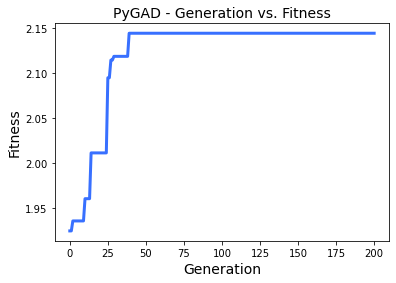

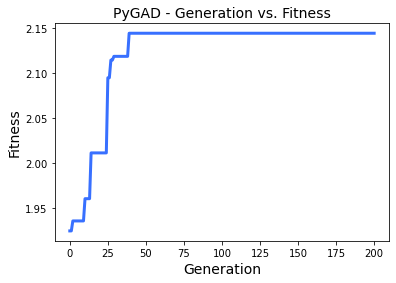

In [115]:
ga_instance.plot_fitness()

In [116]:
obtenerDatosCarga(solution,ofertaUtil)

,Clave,Nombre,Maestro,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado
42,ID0205,Geometría computacional,Naredo García / Enrique,-,20:00-21:00,-,-,18:00-20:00,-
43,ID0206,Interconectividad en redes,Sansores Pérez / Candelaria Elizabeth,-,18:00-20:00,-,16:00-18:00,-,-
57,IL0204,Estadística analítica,Ortega Espinosa / Viridiana Alhelí,18:00-20:00,-,-,18:00-20:00,-,-
75,ID0310,Minería de datos,Gómez García / Hector Fernando,-,-,16:00-18:00,-,16:00-18:00,-
81,IT0425,Introducción a la inteligencia artificial,Sansores Pérez / Candelaria Elizabeth,14:00-16:00,-,14:00-15:00,-,-,-
83,IT0317,Diseño de interfaces humano-máquina,Morales Saavedra / Emmanuel,-,-,15:00-16:00,-,14:00-16:00,-
107,PID0404,Prácticas Profesionales preespecialidad: Innov...,García Fernández / Alejandro,-,-,-,-,-,-
111,DP0499,Seminario de investigación,Reyes Miranda / José Felipe,16:00-18:00,-,18:00-19:00,-,-,-
